In [1]:
import pandas as pd
import numpy as np
!pip install pyfixest -q
import pyfixest as pf
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.5 MB/s eta 0:00:00


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/sshi24/EEMP2024_group_project_EWSS/refs/heads/main/Data/07.11.2024_Data_Python_Project_part-1-oecd-alcohol-consumption-1950-to-2015_fixed.csv',index_col=False)

In [19]:
df.head()

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,...,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,...,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,...,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,...,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,...,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,...,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia


<Axes: xlabel='Cons_pc_Wine', ylabel='Country'>

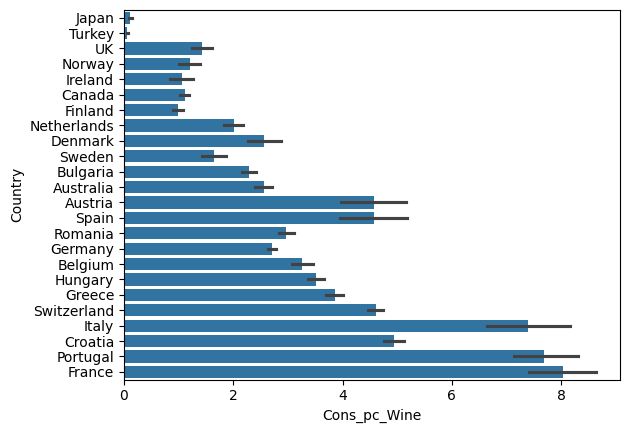

In [25]:
# Show countries ranked by Wine Consumption
dfs=df.sort_values('Cons_pc_Wine')
sns.barplot(x='Cons_pc_Wine', y='Country', data=dfs)

In [47]:
# Create a DataFrame that only includes data from France and Spain
dfn=df[(df.Country.isin(['France', 'Spain']))]
dfn.Country.unique()

array(['France', 'Spain'], dtype=object)

<Axes: xlabel='Country', ylabel='Cons_pc_Wine'>

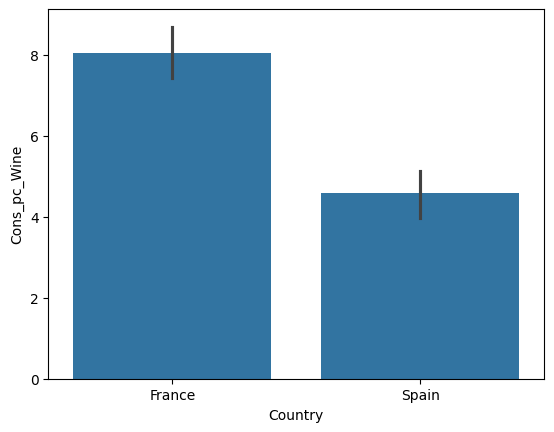

In [48]:
# Compare Cons_pc_Wine between France and Spain
sns.barplot(x='Country', y='Cons_pc_Wine', data=dfn)

In [49]:
# Overview column headers
print(list(dfn.columns.values))

['Year', 'Cons_pc_Beer', 'Cons_pc_Wine', 'Cons_pc_Spirits', 'Cons_pc_Alkohol', 'Exp_pc_Beer ', 'Exp_pc_Wine ', 'Exp_pc_Spirits ', 'Exp_pc_Alkohol ', 'Exp_pc_Total ', 'Exp_pc_Residual ', 'Prices_Beer', 'Prices_Wine', 'Prices_Spirits', 'Prices_Alcohol', 'CPI_Beer', 'CPI_Wine', 'CPI_Spirits', 'CPI_Alcohol', 'CPI_AllGoods', "Population ('000)", 'Real GDPPC', 'Cond_Bugdget_Shares_Beer', 'Cond_Bugdget_Shares_Wine', 'Cond_Bugdget_Shares_Spirits', 'Uncond_Bugdget_Shares_Beer', 'Uncond_Bugdget_Shares_Wine', 'Uncond_Bugdget_Shares_Spirits', 'Uncond_Bugdget_Shares_Alcohol', 'Volume_Shares_Beer', 'Volume_Shares_Wine', 'Volume_Shares_Spirits', 'Exchange_Rate', 'Expenditure_pc_USD_Beer ', 'Expenditure_pc_USD_Wine ', 'Expenditure_pc_USD_Spirits ', 'Expenditure_pc_USD_Alcohol ', 'Expenditure_pc_USD_Total ', 'Expenditure_pc_USD_Residuals ', 'Price_USD_Beer', 'Price_USD_Wine', 'Price_USD_Spirits', 'Price_USD_Alcohol', 'Country']


In [51]:
# Regression of Consc_pc_Wine on price
reg1=pf.feols('Cons_pc_Wine~Prices_Wine', data=dfn)
pf.etable(reg1)

GT(_tbl_data=  level_0        level_1                      0
0    coef    Prices_Wine   -0.047* <br> (0.021)
1    coef      Intercept  8.734*** <br> (1.140)
2   stats   Observations                     63
3   stats      S.E. type                    iid
4   stats  R<sup>2</sup>                  0.073, _body=<great_tables._gt_data.Body object at 0x79e83c1d1b70>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x79e83c39e230>, _spanners=Spanners([SpannerInfo(spanner_id='Cons_pc_Wine', spanner_level=1, spanner_label='Cons_pc_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x79e83cbed810>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='t